In [1]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

In [12]:
import geopandas as gpd
from insitupy.utils.geo import parse_geopandas
from insitupy.utils.io import read_json
import numpy as np
import shapely
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from insitupy import XeniumData
from rasterio.features import rasterize
from pathlib import Path

In [23]:
jsonfile = Path(r"C:\Users\ge37voy\Downloads\tmp\baysor\baysor_output-0017321__N-436-21-N__20240219__131654\segmentation_polygons.geojson")
annotfile = Path(r"C:\Users\ge37voy\Github\InSituPy\notebooks\demo_annotations\annotations-slide_id__sample_id__demo2.geojson")
xdfile = Path("C:/Users/ge37voy/Downloads/tmp/test/")

In [15]:
d = read_json(jsonfile)
xd = XeniumData(xdfile)

In [16]:
xd.read_all()

Reading annotations...
No `annotations` modality found.
Reading cells...
Reading images...
Reading regions...


c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


No `regions` modality found.
Reading transcripts...


In [24]:
xd

XeniumData
Slide ID:	0017321
Sample ID:	N-436-21-N
Data path:	C:\Users\ge37voy\Downloads\tmp
Data folder:	test
Metadata file:	.xeniumdata
    ➤ images
       nuclei:	(1682, 1646)
       HE:	(1682, 1646, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 1046 × 314
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
       boundaries
           BoundariesData object with 2 entries:
               cellular
               nuclear
    ➤ transcripts
       DataFrame with shape 189588 x 10

In [25]:
savefile = xdfile.parent / "savetest"

In [21]:
xd.show()

In [20]:
xd.cells.boundaries.cellular

,cell_id,vertex_x,vertex_y
4420,abbggcnl-1,200.757568,170.680420
4421,abbggcnl-1,197.995117,172.380615
4422,abbggcnl-1,198.632568,181.093018
4423,abbggcnl-1,202.457764,186.617920
4424,abbggcnl-1,205.857666,192.143066
...,...,...,...
594790,jedgdcjb-1,251.970215,10.030518
594791,jedgdcjb-1,251.757568,7.480469
594792,jedgdcjb-1,251.332764,5.992920
594793,jedgdcjb-1,247.720215,1.530518


In [13]:
s = Path("sadf/sfdsj/aökjsdf.parquet")

In [14]:
s.suffix

'.parquet'

In [8]:
xd

XeniumData
Slide ID:	0017321
Sample ID:	N-436-21-N
Data path:	C:\Users\ge37voy\Downloads\tmp
Data folder:	test
Metadata file:	.xeniumdata
    ➤ images
       nuclei:	(1682, 1646)
       HE:	(1682, 1646, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 1046 × 314
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
       boundaries
           Empty BoundariesData object
    ➤ transcripts
       DataFrame with shape 189588 x 10

In [9]:
xd.show()

TypeError: EmptyWidget got an unexpected keyword argument: choices

In [5]:
df = {
    "geometry": [],
    "cell": [],
    "type": [],
    "minx": [],
    "miny": [],
    "maxx": [],
    "maxy": []
}
for elem in tqdm(d["geometries"]):
    coords = elem["coordinates"][0]
    
    # check if there are enough coordinates for a Polygon (some segmented cells are very small in Baysor)
    if len(coords) > 3:
        p = shapely.Polygon(coords)
        df["geometry"].append(p)
        df["type"].append("polygon")
    
    else:
        p = shapely.LineString(coords)
        df["geometry"].append(p)
        df["type"].append("line")
    df["cell"].append(elem["cell"])
    
    # extract bounding box
    bounds = p.bounds
    df["minx"].append(bounds[0])
    df["miny"].append(bounds[1])
    df["maxx"].append(bounds[2])
    df["maxy"].append(bounds[3])

# create geopandas dataframe
df = gpd.GeoDataFrame(df)

100%|██████████| 1573/1573 [00:00<00:00, 14653.67it/s]


In [6]:
df["geometry"]

0       POLYGON ((339.712 298.611, 343.270 301.395, 34...
1       POLYGON ((243.906 279.677, 244.500 280.510, 24...
2       POLYGON ((269.550 126.755, 270.049 128.803, 27...
3       POLYGON ((63.277 265.403, 64.307 265.742, 65.0...
4       POLYGON ((349.779 196.436, 349.666 195.989, 34...
                              ...                        
1568    POLYGON ((199.492 309.354, 203.097 312.295, 20...
1569    POLYGON ((9.806 115.050, 10.241 115.969, 11.57...
1570    POLYGON ((69.446 187.078, 69.996 187.289, 70.9...
1571    POLYGON ((338.980 320.151, 339.934 320.610, 34...
1572    POLYGON ((333.165 274.988, 333.725 275.140, 33...
Name: geometry, Length: 1573, dtype: geometry

In [7]:
img = rasterize(list(zip(df["geometry"], range(1, len(df)+1))), out_shape=(500,500))

In [8]:
img.max()

1573

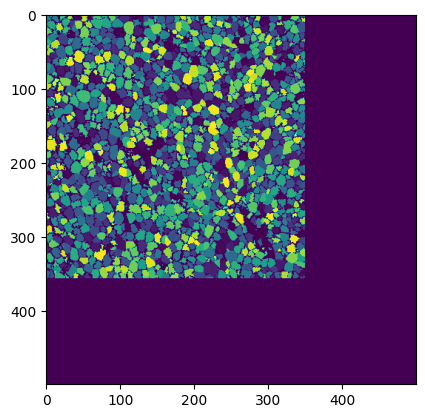

In [9]:
plt.imshow(img)

In [10]:
xd.show()

In [11]:
pixel_size = xd.metadata["pixel_size"]

In [12]:
xd.viewer.add_labels(img, name='cell_mask', scale=(1, 1))

<Labels layer 'cell_mask' at 0x27f95ff67c0>

Cell 1570 is very small and only consists of two points. How is that possible?

In [13]:
# cell stats
cs_file = r"C:\Users\ge37voy\Downloads\tmp\baysor\baysor_output-0017321__N-436-21-N__20240219__131654\segmentation_cell_stats.csv"
pd.read_csv(cs_file)

,cell,x,y,z,cluster,n_transcripts,density,elongation,area,avg_confidence,avg_assignment_confidence,max_cluster_frac,lifespan
0,CR1548b828b-1,6.678945,2.068309,16.642422,4,24,1.5710,1.327,15.280,0.9984,0.9817,1.000000,50
1,CR1548b828b-2,12.842599,5.376065,16.708813,1,102,1.0890,2.562,93.680,0.9886,0.8935,0.990196,50
2,CR1548b828b-3,3.035172,22.848029,16.470479,1,91,1.1750,1.846,77.440,0.9865,0.9237,1.000000,50
3,CR1548b828b-4,23.598982,3.279715,15.753729,1,35,0.6226,3.414,56.220,0.8552,0.9594,0.885714,50
4,CR1548b828b-5,7.282680,15.050926,16.281299,1,162,1.4110,2.296,114.800,0.9950,0.8952,0.993827,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,CR1548b828b-1569,75.532472,7.444092,13.794286,1,2,NaN,NaN,NaN,0.9996,0.1200,1.000000,6
1569,CR1548b828b-1570,32.771730,209.639650,17.615406,1,1,NaN,NaN,NaN,0.9897,0.0800,1.000000,6
1570,CR1548b828b-1571,118.189330,89.144285,13.829876,1,2,NaN,NaN,NaN,0.9385,0.0700,1.000000,6
1571,CR1548b828b-1572,2.528076,125.980926,17.133464,1,8,1.4430,1.770,5.543,0.9857,0.0375,1.000000,3


In [14]:
import scanpy as sc

In [15]:
loomfile = r"C:\Users\ge37voy\Downloads\tmp\baysor\baysor_output-0017321__N-436-21-N__20240219__131654\segmentation_counts.loom"
adata = sc.read_loom(loomfile)

c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\anndata\_core\anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\anndata\_core\anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [16]:
xd.cells.matrix

AnnData object with n_obs × n_vars = 1046 × 314
    obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'

In [19]:
xd.cells.boundaries.cellular

,cell_id,vertex_x,vertex_y
4420,abbggcnl-1,200.757568,170.680420
4421,abbggcnl-1,197.995117,172.380615
4422,abbggcnl-1,198.632568,181.093018
4423,abbggcnl-1,202.457764,186.617920
4424,abbggcnl-1,205.857666,192.143066
...,...,...,...
594790,jedgdcjb-1,251.970215,10.030518
594791,jedgdcjb-1,251.757568,7.480469
594792,jedgdcjb-1,251.332764,5.992920
594793,jedgdcjb-1,247.720215,1.530518


In [17]:
adata

AnnData object with n_obs × n_vars = 1573 × 320
    obs: 'Name', 'area', 'avg_assignment_confidence', 'avg_confidence', 'cluster', 'density', 'elongation', 'lifespan', 'max_cluster_frac', 'n_transcripts', 'x', 'y', 'z'
    var: 'Name'

In [ ]:
adata.obs

,Name,area,avg_assignment_confidence,avg_confidence,cluster,density,elongation,lifespan,max_cluster_frac,n_transcripts,x,y,z
CellID,,,,,,,,,,,,,
1.0,CR1548b828b-1,15.280,0.9817,0.9984,4,1.5710,1.327,50,1.000000,24,6.678945,2.068309,16.642422
2.0,CR1548b828b-2,93.680,0.8935,0.9886,1,1.0890,2.562,50,0.990196,102,12.842599,5.376065,16.708813
3.0,CR1548b828b-3,77.440,0.9237,0.9865,1,1.1750,1.846,50,1.000000,91,3.035172,22.848029,16.470479
4.0,CR1548b828b-4,56.220,0.9594,0.8552,1,0.6226,3.414,50,0.885714,35,23.598982,3.279715,15.753729
5.0,CR1548b828b-5,114.800,0.8952,0.9950,1,1.4110,2.296,50,0.993827,162,7.282680,15.050926,16.281299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569.0,CR1548b828b-1569,NaN,0.1200,0.9996,1,NaN,NaN,6,1.000000,2,75.532472,7.444092,13.794286
1570.0,CR1548b828b-1570,NaN,0.0800,0.9897,1,NaN,NaN,6,1.000000,1,32.771730,209.639650,17.615406
1571.0,CR1548b828b-1571,NaN,0.0700,0.9385,1,NaN,NaN,6,1.000000,2,118.189330,89.144285,13.829876
